In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: xlabel='R&D Spend', ylabel='Profit'>

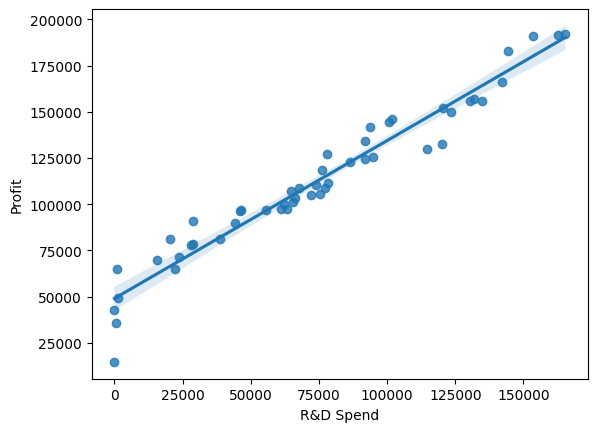

In [4]:
sns.regplot(df,x='R&D Spend', y='Profit')

<Axes: xlabel='Administration', ylabel='Profit'>

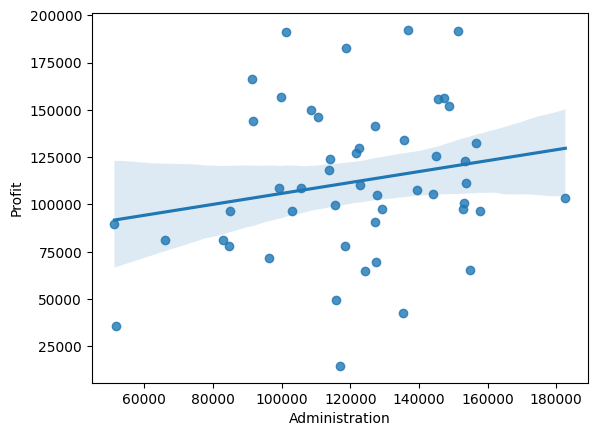

In [5]:
sns.regplot(df,x='Administration', y='Profit')

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

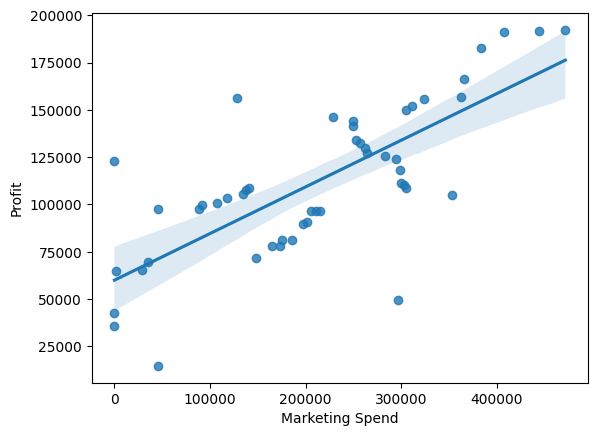

In [6]:
sns.regplot(df,x='Marketing Spend', y='Profit')

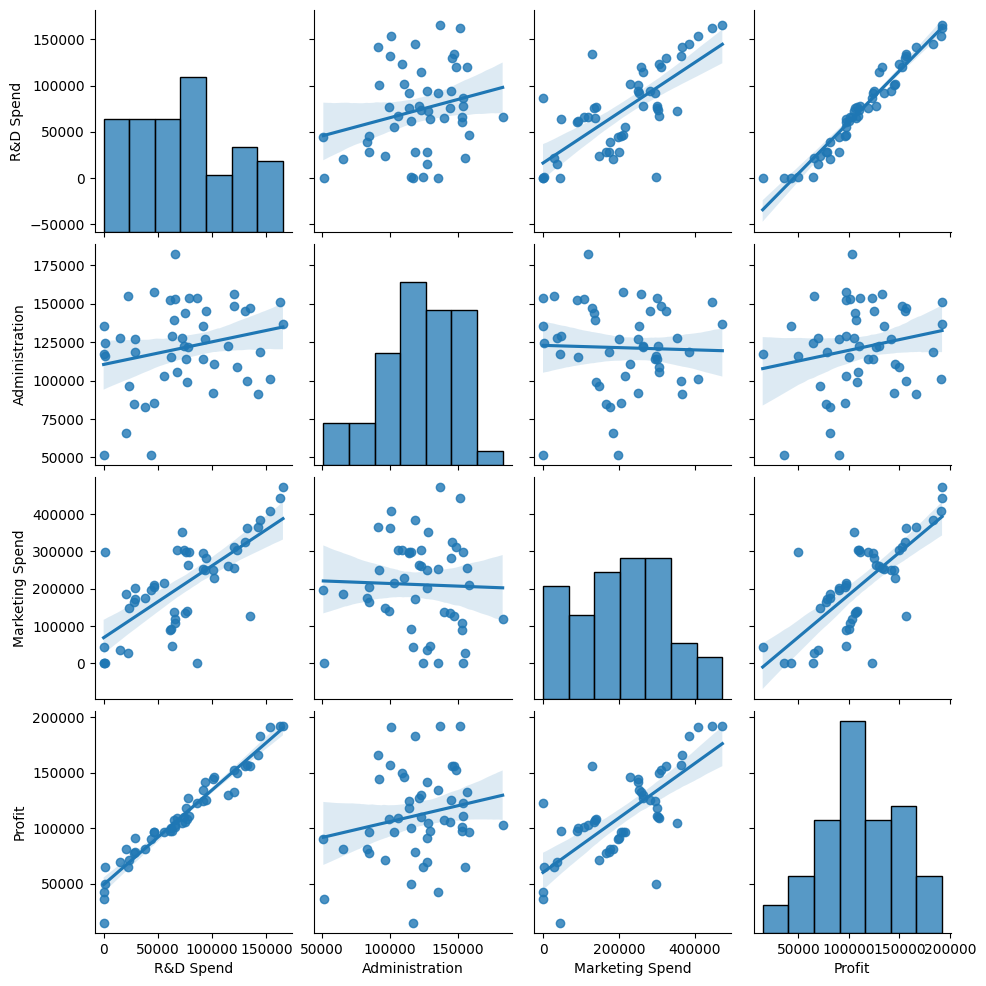

In [7]:
sns.pairplot(df, kind='reg')

<Axes: xlabel='State', ylabel='Profit'>

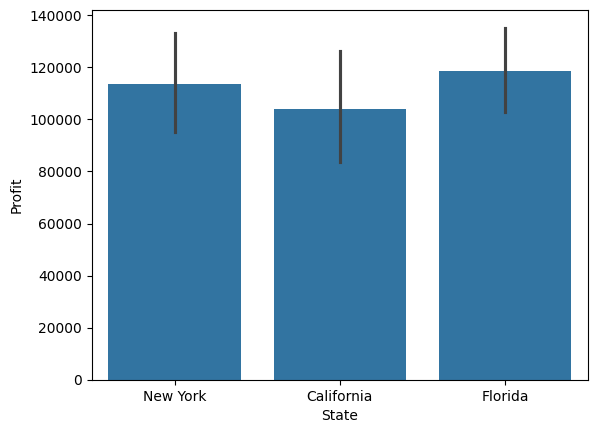

In [8]:
sns.barplot(df, x='State', y='Profit')

In [9]:
x = df.drop(columns=['Profit']) 
y = df['Profit']

In [10]:
print(x)

    R&D Spend  Administration  Marketing Spend       State
0   165349.20       136897.80        471784.10    New York
1   162597.70       151377.59        443898.53  California
2   153441.51       101145.55        407934.54     Florida
3   144372.41       118671.85        383199.62    New York
4   142107.34        91391.77        366168.42     Florida
5   131876.90        99814.71        362861.36    New York
6   134615.46       147198.87        127716.82  California
7   130298.13       145530.06        323876.68     Florida
8   120542.52       148718.95        311613.29    New York
9   123334.88       108679.17        304981.62  California
10  101913.08       110594.11        229160.95     Florida
11  100671.96        91790.61        249744.55  California
12   93863.75       127320.38        249839.44     Florida
13   91992.39       135495.07        252664.93  California
14  119943.24       156547.42        256512.92     Florida
15  114523.61       122616.84        261776.23    New Yo

In [11]:
print(y)

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64


In [12]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
cat_cols = x.select_dtypes(include=['object']).columns
num_cols = x.select_dtypes(exclude=['object']).columns

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 

Pipeline


In [15]:
cat_pipe = Pipeline(
    steps=[
        ('encoder', OneHotEncoder(drop='first'))
    ]
)

In [16]:
num_pipe = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
    ]
)

In [17]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_pipe, cat_cols),
    ('num', num_pipe, num_cols)
] )

In [18]:
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('lr', LinearRegression()) # Linear Regression Model with peprocessing
    ]
)

In [19]:
model.fit(Xtrain, ytrain)

,steps,"[('preprocessor', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [20]:
from joblib import dump, load #dump is used to save the model and load is used to load the model
with open('models/multiple_linear_regression.pkl', 'wb') as f:
    dump(model, f) #dumping the model into the file
    print("Model saved successfully!")

Model saved successfully!


In [21]:
import gradio as gr
import pandas as pd
def prediction(rnd, admin, market, state):
    #make a single record dataframe
    df = pd.DataFrame({
        'R&D Spend': [rnd],
        'Administration': [admin],
        'Marketing Spend': [market],
        'State': [state]
    })
    
    #load joblib model file
    with open('models/multiple_linear_regression.pkl', 'rb') as f:
        model = load(f)
        
    #predict the profit
    profit = model.predict(df) #returns numpy array
    return profit[0] #return the profit value

ui = gr.Interface(
    fn = prediction,
    inputs=['number', 'number', 'number', 'text'],
    outputs = gr.Text(),
    title='50 Startups Profit Prediction',
    examples = [[165340, 136897, 471784, 'New York']]
)
ui.launch()

c:\Users\ACER\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [22]:
sf = pd.read_csv('Student_Performance_Missing.csv')
sf

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,Yes,9.0,1.0,91.0
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,NaN,No,8.0,5.0,66.0
...,...,...,...,...,...,...
9995,1.0,49.0,Yes,4.0,2.0,23.0
9996,7.0,64.0,Yes,8.0,5.0,58.0
9997,6.0,83.0,NaN,8.0,5.0,NaN
9998,9.0,97.0,Yes,NaN,0.0,95.0


In [23]:
sf.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,Yes,9.0,1.0,91.0
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,NaN,No,8.0,5.0,66.0


In [24]:
sf.isnull().sum()

Hours Studied                       1046
Previous Scores                      991
Extracurricular Activities           976
Sleep Hours                          954
Sample Question Papers Practiced    1035
Performance Index                    998
dtype: int64

In [25]:
num_cols = sf.select_dtypes('number').columns 
print(num_cols.tolist())

['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


In [26]:
cat_cols = sf.select_dtypes(exclude='number').columns 
print(cat_cols.tolist())

['Extracurricular Activities']


In [27]:
num_imp = SimpleImputer()
cat_imp = SimpleImputer(strategy='most_frequent') 

In [28]:
sf[num_cols] = num_imp.fit_transform(sf[num_cols]) 
sf

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.000000,Yes,9.000000,1.0,91.000000
1,4.0,82.000000,No,4.000000,2.0,65.000000
2,8.0,51.000000,Yes,7.000000,2.0,45.000000
3,5.0,52.000000,Yes,5.000000,2.0,36.000000
4,7.0,69.448995,No,8.000000,5.0,66.000000
...,...,...,...,...,...,...
9995,1.0,49.000000,Yes,4.000000,2.0,23.000000
9996,7.0,64.000000,Yes,8.000000,5.0,58.000000
9997,6.0,83.000000,NaN,8.000000,5.0,55.213175
9998,9.0,97.000000,Yes,6.532169,0.0,95.000000


In [29]:
sf[['Extracurricular Activities']]= cat_imp.fit_transform(sf[['Extracurricular Activities']])
sf

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.000000,Yes,9.000000,1.0,91.000000
1,4.0,82.000000,No,4.000000,2.0,65.000000
2,8.0,51.000000,Yes,7.000000,2.0,45.000000
3,5.0,52.000000,Yes,5.000000,2.0,36.000000
4,7.0,69.448995,No,8.000000,5.0,66.000000
...,...,...,...,...,...,...
9995,1.0,49.000000,Yes,4.000000,2.0,23.000000
9996,7.0,64.000000,Yes,8.000000,5.0,58.000000
9997,6.0,83.000000,No,8.000000,5.0,55.213175
9998,9.0,97.000000,Yes,6.532169,0.0,95.000000


In [30]:
sf.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [31]:
x = sf.drop(columns=['Performance Index']) 
y = sf['Performance Index']

In [32]:
print(x)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0               7.0        99.000000                        Yes     9.000000   
1               4.0        82.000000                         No     4.000000   
2               8.0        51.000000                        Yes     7.000000   
3               5.0        52.000000                        Yes     5.000000   
4               7.0        69.448995                         No     8.000000   
...             ...              ...                        ...          ...   
9995            1.0        49.000000                        Yes     4.000000   
9996            7.0        64.000000                        Yes     8.000000   
9997            6.0        83.000000                         No     8.000000   
9998            9.0        97.000000                        Yes     6.532169   
9999            7.0        74.000000                         No     6.532169   

      Sample Question Papers Practiced 

In [33]:
print(y)

0       91.000000
1       65.000000
2       45.000000
3       36.000000
4       66.000000
          ...    
9995    23.000000
9996    58.000000
9997    55.213175
9998    95.000000
9999    64.000000
Name: Performance Index, Length: 10000, dtype: float64


In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [35]:
cat_cols = x.select_dtypes(include=['object']).columns
num_cols = x.select_dtypes(exclude=['object']).columns

In [36]:
cat_pipe = Pipeline(
    steps=[
        ('encoder', OneHotEncoder(drop='first'))
    ]
)

In [37]:
num_pipe = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
    ]
)

In [38]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_pipe, cat_cols),
    ('num', num_pipe, num_cols)
] )

In [39]:
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('lr', LinearRegression()) # Linear Regression Model with peprocessing
    ]
)

In [40]:
model.fit(Xtrain, ytrain)

,steps,"[('preprocessor', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [41]:
import gradio as gr
import pandas as pd
def prediction(rnd, admin, market, state):
    #make a single record dataframe
    df = pd.DataFrame({
        'R&D Spend': [rnd],
        'Administration': [admin],
        'Marketing Spend': [market],
        'State': [state]
    })
    
    #load joblib model file
    with open('models/multiple_linear_regression.pkl', 'rb') as f:
        model = load(f)
        
    #predict the profit
    profit = model.predict(df) #returns numpy array
    return profit[0] #return the profit value

ui = gr.Interface(
    fn = prediction,
    inputs=['number', 'number', 'number', 'text'],
    outputs = gr.Text(),
    title='50 Startups Profit Prediction',
    examples = [[165340, 136897, 471784, 'New York']]
)
ui.launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
